<a href="https://colab.research.google.com/github/CodyBurker/W266_Group_Project/blob/CodyCNNBase/CodyCNNAnalysis2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Based on: https://machinelearningmastery.com/develop-word-embedding-model-predicting-movie-review-sentiment/

In [2]:
import pandas as pd
import string
from nltk.corpus import stopwords
import nltk

In [3]:
!git clone https://github.com/CodyBurker/W266_Group_Project

Cloning into 'W266_Group_Project'...
remote: Enumerating objects: 35, done.
remote: Counting objects: 100% (35/35), done.
remote: Compressing objects: 100% (29/29), done.
remote: Total 35 (delta 10), reused 22 (delta 2), pack-reused 0
Unpacking objects: 100% (35/35), done.
Checking out files: 100% (9/9), done.


In [4]:
def read_in_data(path="W266_Group_Project/"):
    import pandas as pd
    X_train = pd.read_csv(path + "x_train_sampled_yelp_data.csv")
    y_train = pd.read_csv(path + "y_train_sampled_yelp_data.csv")
    X_test = pd.read_csv(path + "x_test_sampled_yelp_data.csv")
    y_test = pd.read_csv(path + "y_test_sampled_yelp_data.csv")
    return X_train, X_test, y_train, y_test

In [5]:
 X_train, X_test, y_train, y_test = read_in_data()

https://towardsdev.com/sentiment-analysis-with-cnn-using-keras-c4debff57fc5?gi=708b4ef40e2f

Encode text and pad it.

In [6]:
from keras_preprocessing.text import Tokenizer
from keras_preprocessing.sequence import pad_sequences

In [ ]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(X_train['text'])


In [8]:
X_train['encoded'] = tokenizer.texts_to_sequences(X_train['text'])
X_test['encoded'] = tokenizer.texts_to_sequences(X_test['text'])

In [9]:
# Hyper parameters to tune later: maxlen, padding
sentence_len = 10000
X_train_encoded =  pad_sequences(X_train['encoded'], maxlen=sentence_len, padding='post')
X_test_encoded = pad_sequences(X_test['encoded'], maxlen=sentence_len, padding='post')
print(X_train_encoded.shape)
print(X_test_encoded.shape)

(80000, 10000)
(20000, 10000)


Create model

In [11]:
from keras import Sequential
from keras.layers import Dense, Embedding, Activation, Dropout
from keras.layers import  MaxPool1D, GlobalMaxPool1D, Conv1D
vocab_size = len(tokenizer.word_counts)

model = Sequential()
model.add(Embedding(vocab_size,300, input_length = sentence_len))
model.add(Conv1D(64,8,activation="relu"))
model.add(MaxPool1D(2))

model.add(Dense(32, activation="relu"))
model.add(Dropout(0.5))
model.add(Dense(16,activation='relu'))
model.add(GlobalMaxPool1D())
model.add(Dense(3,activation='softmax'))
model.summary()



Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 10000, 300)        23360400  
                                                                 
 conv1d (Conv1D)             (None, 9993, 64)          153664    
                                                                 
 max_pooling1d (MaxPooling1D  (None, 4996, 64)         0         
 )                                                               
                                                                 
 dense (Dense)               (None, 4996, 32)          2080      
                                                                 
 dropout (Dropout)           (None, 4996, 32)          0         
                                                                 
 dense_1 (Dense)             (None, 4996, 16)          528       
                                                      

In [12]:
# model.compile(optimizer='adam', loss='mse',metrics=['mse'])

In [ ]:
# model.fit(X_train_encoded,y_train, epochs=10, validation_data = [X_test_encoded, y_test])

In [ ]:
# Save model
# from google.colab import drive
# drive.mount('/content/drive')
# model.save("/content/drive/MyDrive/Code Repos/YelpCNN")

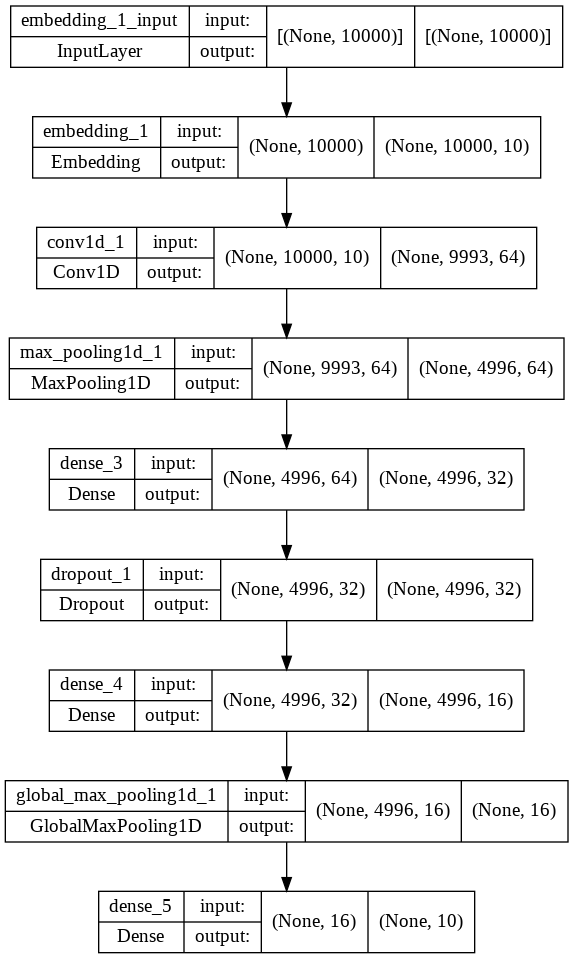

In [13]:
# New model architecture
model2 = Sequential()
model2.add(Embedding(vocab_size,10, input_length = sentence_len))
model2.add(Conv1D(64,8,activation="relu"))
model2.add(MaxPool1D(2))
model2.add(Dense(32, activation="relu"))
model2.add(Dropout(0.5))
model2.add(Dense(16,activation='relu'))
model2.add(GlobalMaxPool1D())
model2.add(Dense(10,activation='softmax'))
from keras.utils.vis_utils import plot_model
model2.compile(optimizer='adam', loss='mse',metrics=['mse'])
plot_model(model2,show_shapes=True)


In [ ]:
model2.fit(X_train_encoded,y_train, epochs=3, validation_data = [X_test_encoded, y_test])